In [1]:
# FS conversion of CM's FFT & SciPy lecture notebooks: 
#        * port to Python 3, e.g. len() and print()
#        * use np. prefix to make it clear we're using numpy methods
#        * use scipy.io.wavfile to read sound
#        * use matplotlib.pyplot for plotting
#        * // instead of / for integer division

%matplotlib inline 

import numpy as np
import pylab
import matplotlib.pyplot as plt

# Although there are Fourier-related methods in NumPy, 
# seemingly we are supposed to use the SciPy ones so that
# eventually NumPy becomes a numbers-oriented, rather than
# higher-level methods-oriented library.

from scipy.fftpack import rfft, rfftfreq, irfft
from scipy.io import wavfile

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    

# Make up a signal/wave

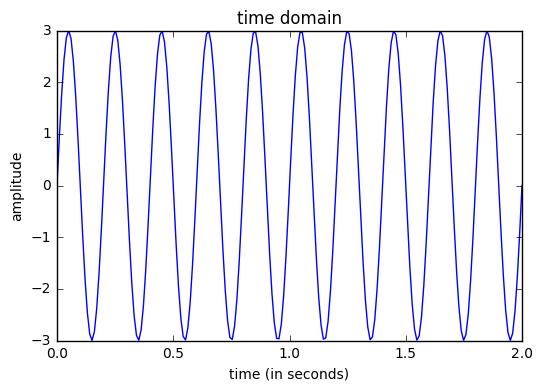

In [2]:

freq = 5 # In Hertz (Hz,) the number of cycles per second
amplitude = 3 # Height of the wave

time_to_plot = 2 # seconds
sample_rate = 100 # In Hz, the number of samples per second
t = np.linspace(0, time_to_plot, sample_rate * time_to_plot)

signal = amplitude * np.sin(freq * 2 * np.pi * t) # Explain the 2*pi, the two is one fill circle and we get period

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='time domain')

plt.plot(t, signal)

# Convert to the frequency domain

The biggest amplitude frequency is 5 Hz


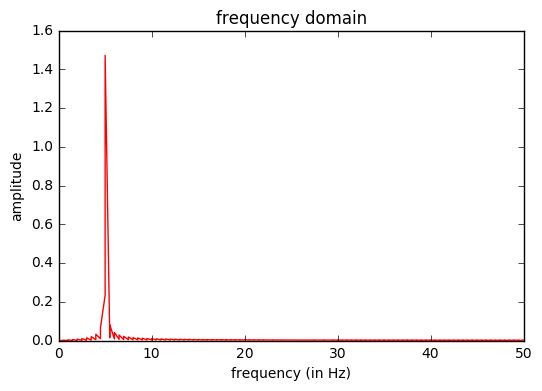

In [3]:
# Use rfft for signals with real numbers only, no imaginary parts. 
# It avoids computing the imaginary output which would be the same as
# the real output.

fft_output = rfft(signal) 

fft_magnitude_only = np.abs(fft_output) / len(fft_output)

frequencies_fft = rfftfreq(len(signal),1/sample_rate) # Calculate all possible frequencies in signal.

setup_graph(x_label='frequency (in Hz)', y_label='amplitude', title='frequency domain')

plt.plot(frequencies_fft, fft_magnitude_only, 'r')

print('The biggest amplitude frequency is %0.f Hz' %frequencies_fft[np.argmax(fft_magnitude_only)])

## Question: So what does the Fourier Transform give us?

* The amplitudes of simple sine waves
* Their starting position - phase (we won't get into this part much)

## Question: what sine wave frequencies are used?

* Answer: This is determined by how many samples are provided to the Fourier Transform
* Frequencies range from 0 to 1/2 the number of samples
* **Example: If your sample rate is 100Hz, and you give the FFT 100 samples, the FFT will return the amplitude of the components with frequencies 0 to 50Hz.**

In [4]:
# Read them in from files and convert them from what whatever format they're stored in into a list of numbers.

(sample_rate_eh, input_signal_eh) = wavfile.read("audio_files/vowel_eh.wav")
(sample_rate_ah, input_signal_ah) = wavfile.read("audio_files/vowel_ah.wav")

print('Number of individual samples in Eh signal is ...', len(input_signal_eh))
print('The sampling rate should be twice the approx max frequency of human hearing (22 kHz) ...', sample_rate_eh)

Number of individual samples in Eh signal is ... 111616
The sampling rate should be twice the approx max frequency of human hearing (22 kHz) ... 44100


In [5]:
# Make a list of times, one for each sample. Assume sample rate is in Hz so times are in seconds.

time_array_eh = np.arange(0, len(input_signal_eh)/sample_rate_eh, 1/sample_rate_eh)
time_array_ah = np.arange(0, len(input_signal_ah)/sample_rate_ah, 1/sample_rate_ah)

# To avoid too much calculation, let's use signal durations of only 1/10th second.

time_array_eh = time_array_eh[0:(sample_rate_eh//10)+2]
time_array_ah = time_array_ah[0:(sample_rate_ah//10)+2]

input_signal_eh = input_signal_eh[0:(sample_rate_eh//10)+2]
input_signal_ah = input_signal_ah[0:(sample_rate_eh//10)+2]

print(len(time_array_eh))
print(len(input_signal_eh))


4412
4412


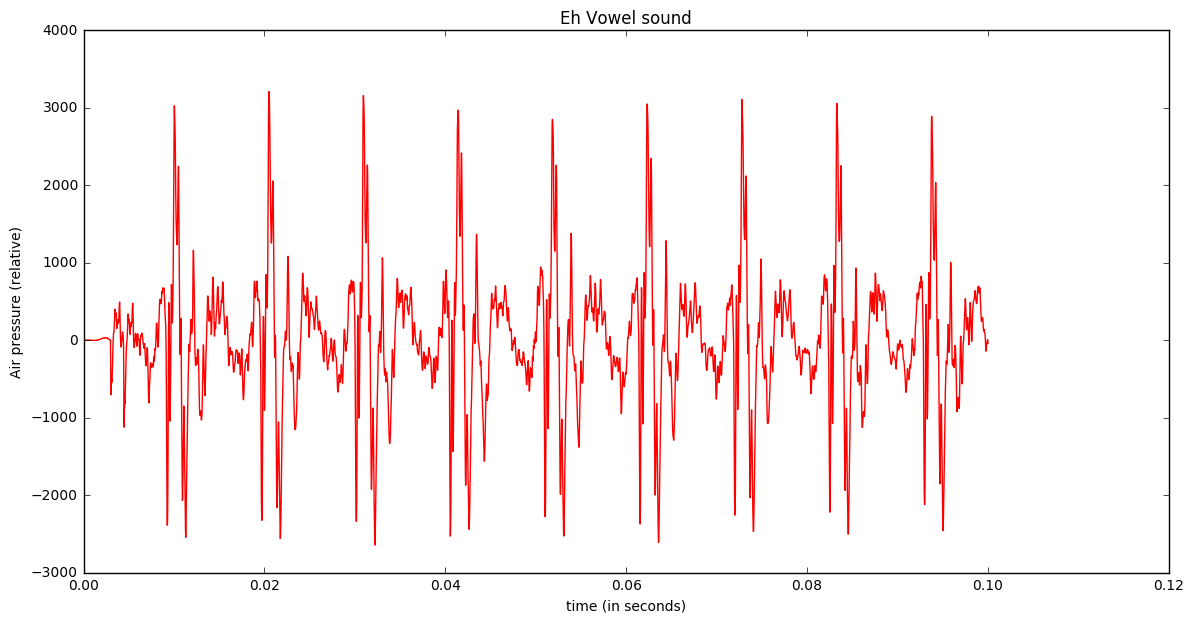

In [6]:
# Plot sound pressure level versus time

setup_graph(title='Eh Vowel sound', x_label='time (in seconds)', y_label='Air pressure (relative)', fig_size=(14,7))

plt.plot(time_array_eh, input_signal_eh,color='r')
plt.show()

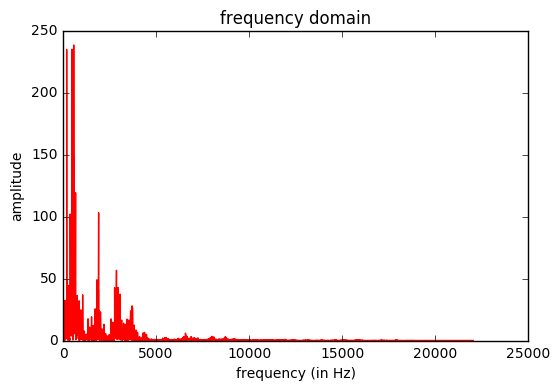

In [7]:
fft_output_eh = rfft(input_signal_eh)

fft_magnitude_only_eh = np.abs(fft_output_eh) / len(fft_output_eh)

frequencies_fft_eh = rfftfreq(len(input_signal_eh),1/sample_rate_eh) # Calculate all possible frequencies in signal.

setup_graph(x_label='frequency (in Hz)', y_label='amplitude', title='frequency domain')

plt.plot(frequencies_fft_eh, fft_magnitude_only_eh, 'r')


# Look at the frequency with the biggest amplitude.

The biggest amplitude frequency is 569.7 Hz


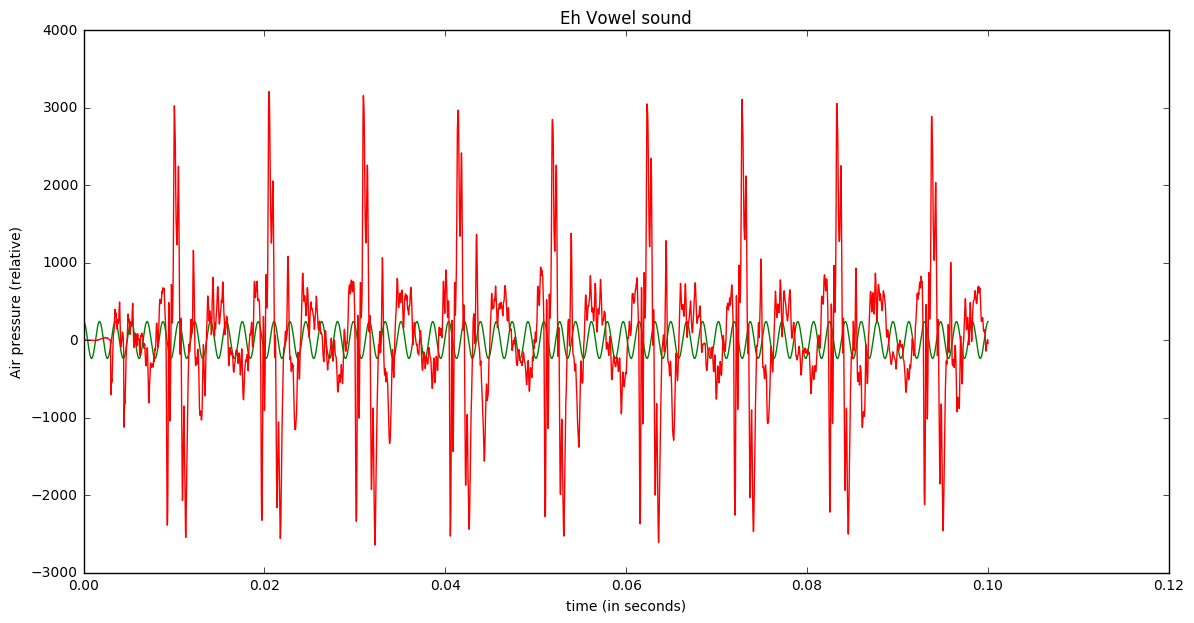

In [8]:
# Get the frequency with the biggest amplitude.
max_freq_idx = np.argmax(fft_magnitude_only_eh) 
max_freq_eh = frequencies_fft_eh[ max_freq_idx ] 

print('The biggest amplitude frequency is {:0.1f} Hz'.format(max_freq_eh))

# Have a look to see whether this frequency makes sense wrt the original data!
setup_graph(title='Eh Vowel sound', x_label='time (in seconds)', y_label='Air pressure (relative)', fig_size=(14,7))

cos_max_freq_eh =  np.cos(max_freq_eh * 2 * np.pi * time_array_eh) * fft_magnitude_only_eh[max_freq_idx]

plt.plot(time_array_eh, cos_max_freq_eh, color='g')
plt.plot(time_array_eh, input_signal_eh, color='r')

plt.show()

# Look at the (sum of the) first n frequencies.

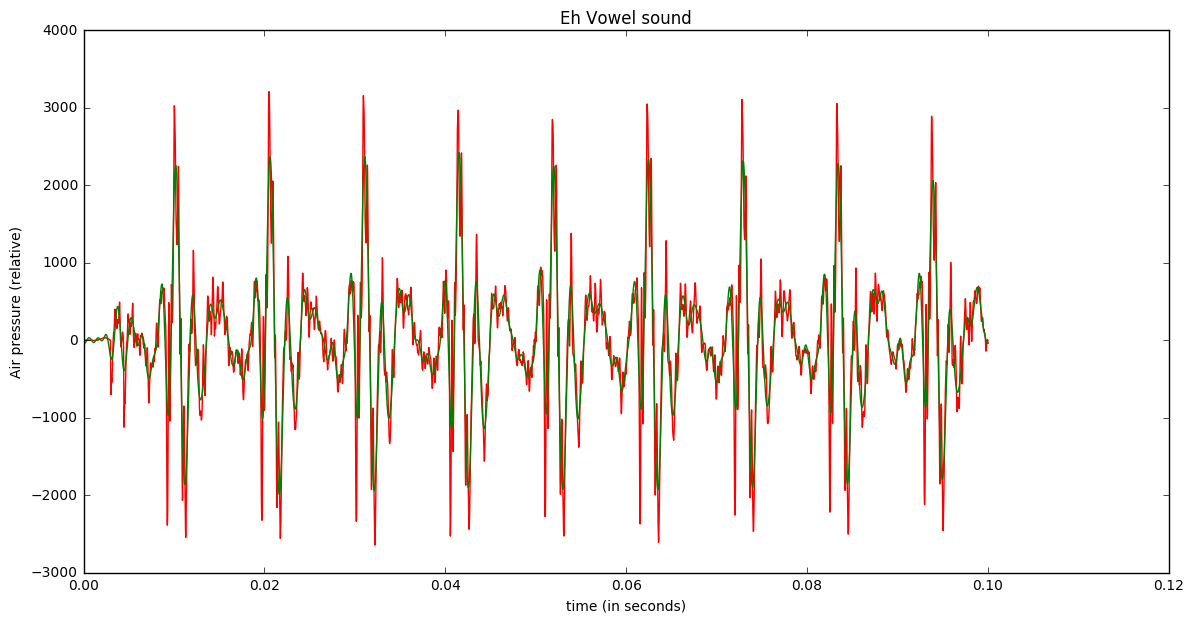

In [9]:
# Similar to the above using but getting a range of frequencies 
# and using inverse FFT method to construct signal to plot

partial_fft_range = np.arange(0, 200, 1)

partial_fft_output_eh = np.zeros(len(fft_output_eh))

partial_fft_output_eh[partial_fft_range] = fft_output_eh[partial_fft_range]

partial_input_signal_eh = irfft(partial_fft_output_eh)

setup_graph(title='Eh Vowel sound', x_label='time (in seconds)', y_label='Air pressure (relative)', fig_size=(14,7))

plt.plot(time_array_eh, input_signal_eh, color='r')
plt.plot(time_array_eh, partial_input_signal_eh, color='g')

plt.show()

# Look at (the sum of) the n frequencies with the biggest amplitudes.


The top 10 frequencies are [  569.74161378   479.7824116    189.91387126   579.73708069   669.69628286
  1909.13417951   379.82774252   569.74161378   469.7869447    589.7325476 ]


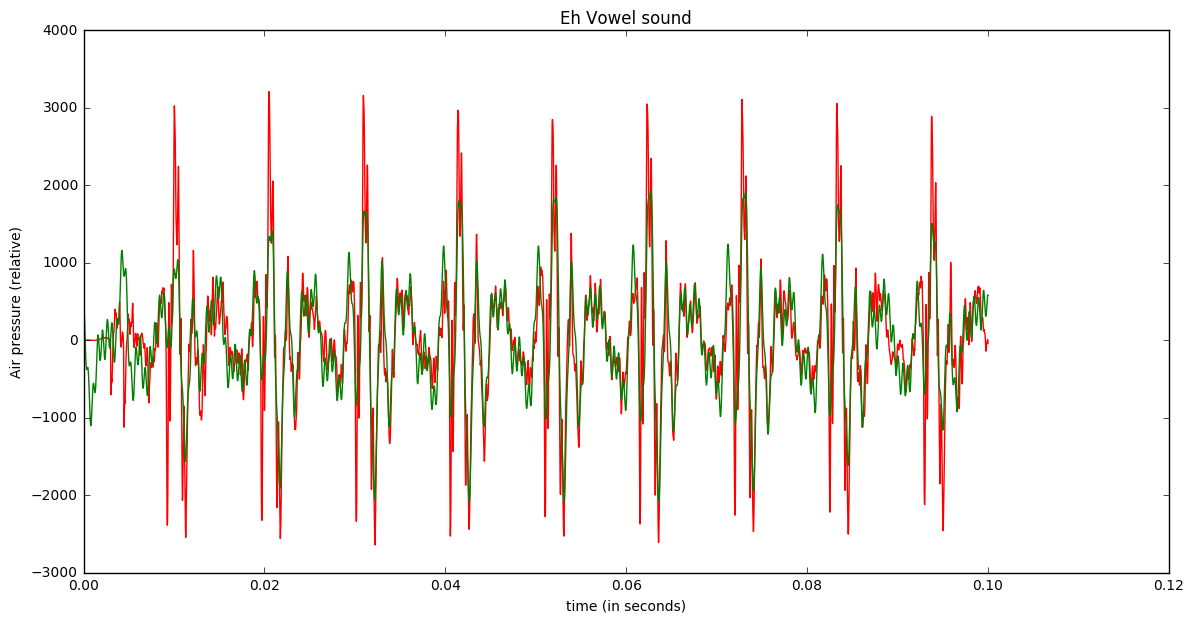

In [10]:
# Similar to the above but getting the top n frequencies and plotting their sum.

top = 10 # The number of maxima we want to find

# Get their indices in the array. Found this syntax on StackOverflow. 
idx = (-fft_magnitude_only_eh).argsort()[:top] 

print('The top {} frequencies are {}'.format(top,frequencies_fft_eh[idx]))

partial_fft_output_eh = np.zeros(len(fft_output_eh))

partial_fft_output_eh[idx] = fft_output_eh[idx]

partial_input_signal_eh = irfft(partial_fft_output_eh)

setup_graph(title='Eh Vowel sound', x_label='time (in seconds)', y_label='Air pressure (relative)', fig_size=(14,7))

plt.plot(time_array_eh, input_signal_eh, color='r')
plt.plot(time_array_eh, partial_input_signal_eh, color='g')

plt.show()

# Lab Assignment: Work out why the amplitudes of the ifft plot above and the cos plot are different.

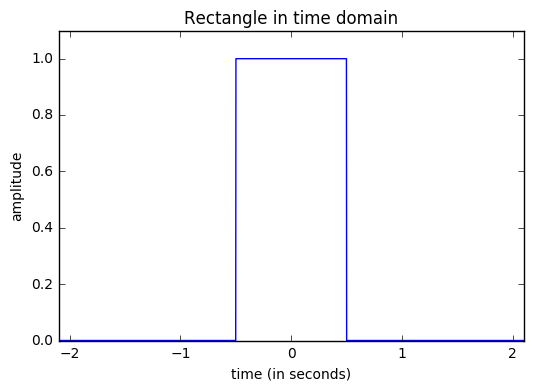

As expected square function we het sinc c function!


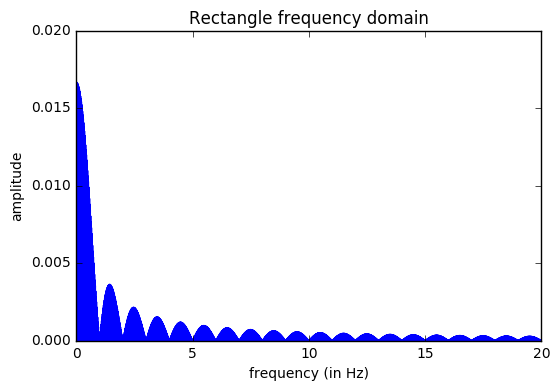

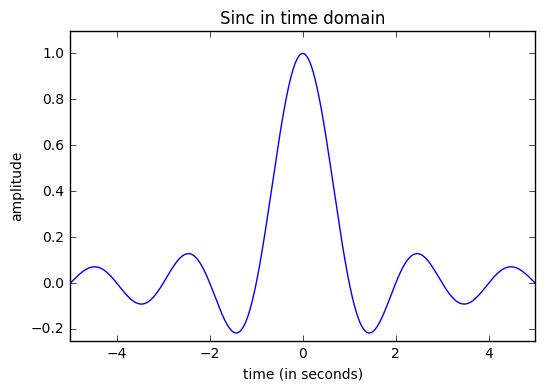

Sinc is close to square and limiting to dirac impulz


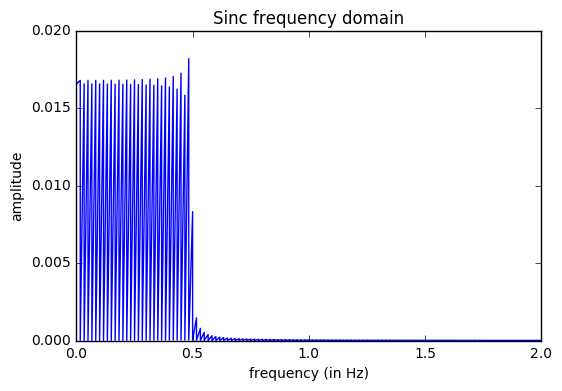

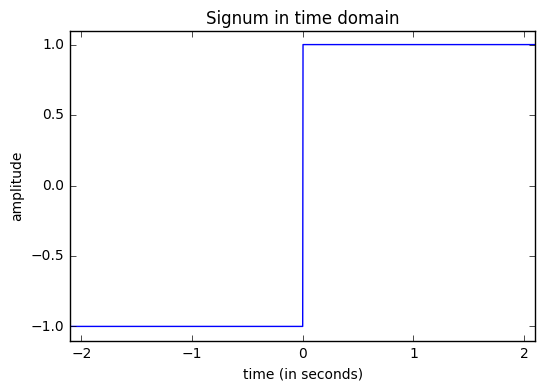

Signum has higher amplitude but less carriers then square function


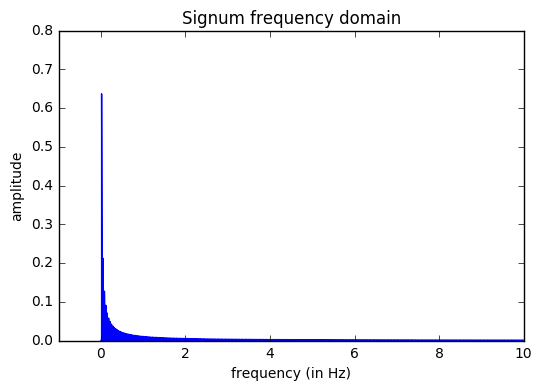

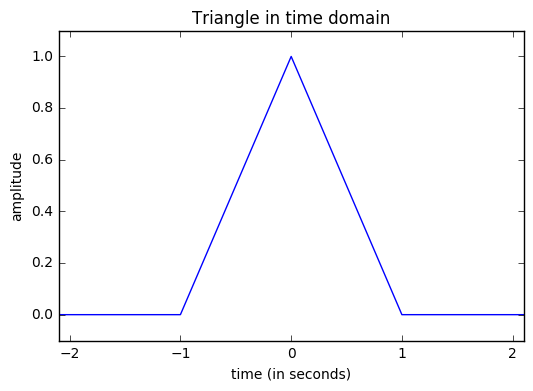

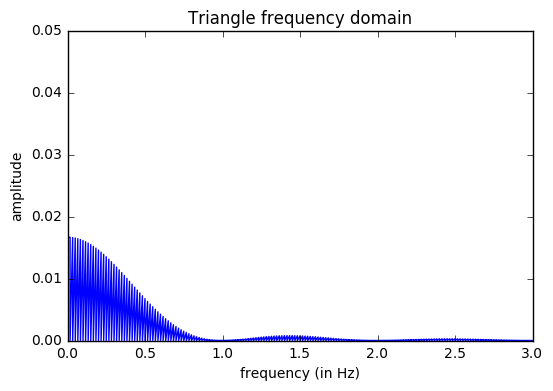

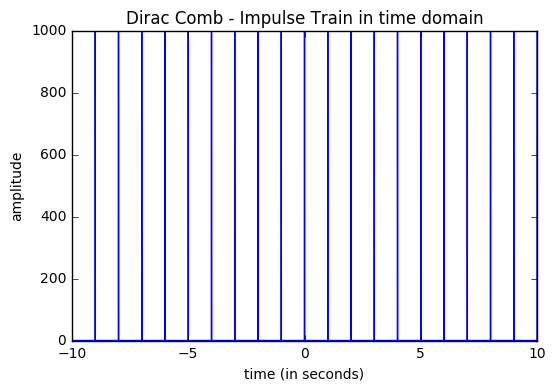

We get impulzes in both domains


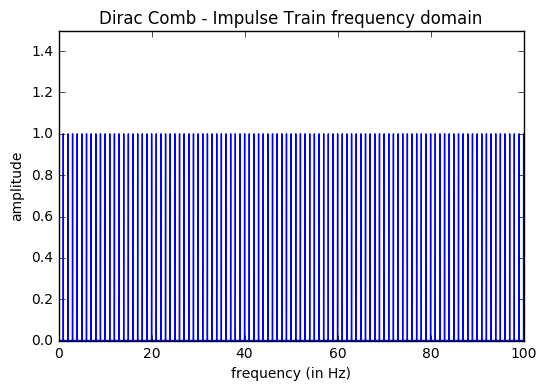

In [3]:
'''
Lab 2 Discrete Fourier Transform. 

Use a SciPy to compute the power spectra of discrete versions of the following functions. Plot them all nicely 
in a table.
'''
#import libs

%matplotlib inline 

import numpy as np
import pylab
import matplotlib.pyplot as plt
import math
from scipy.fftpack import rfft, rfftfreq, irfft

start_time = -30
stop_time = 30
time_to_plot = 60 # seconds
sample_rate = 1000 # In Hz, the number of samples per second
total_number_of_sample = sample_rate * time_to_plot #+ 1 #Odd numbers get you zero with linspace
t = np.linspace(start_time, stop_time, total_number_of_sample) #Odd numbers get you zero with linspace

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

#Rectangle
#rect = np.linspace(0,1,total_number_of_sample)
for i in range(len(t)):
    if((t[i] > -0.5) & (t[i] < 0.5)):
        rect[i] = 1
    elif((t[i] == 0.5) &(t[i] == -0.5)):
        rect[i] = 0.5
    else:
        rect[i] = 0

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='Rectangle in time domain')
plt.axis([-2.1, 2.1, 0,1.1])
plt.plot(t, rect)
plt.show()


fft_output_rect = rfft(rect)
fft_magnitude_only_rect = np.abs(fft_output_rect) / len(fft_output_rect)
frequencies_fft_rect = rfftfreq(len(rect),1/sample_rate) # Calculate all possible frequencies in signal.
setup_graph(x_label='frequency (in Hz)', y_label='amplitude', title='Rectangle frequency domain')
plt.axis([0, 20, 0,0.02])
plt.plot(frequencies_fft_rect, fft_magnitude_only_rect, 'b')

print("As expected square function we het sinc c function!")

#Sinc
sinc_func = np.sinc(t)
setup_graph(x_label='time (in seconds)', y_label='amplitude', title='Sinc in time domain')
plt.axis([-5, 5, -0.25,1.1])
plt.plot(t, sinc_func)
plt.show()

fft_output_sinc_func  = rfft(sinc_func )
fft_magnitude_only_sinc_func = np.abs(fft_output_sinc_func ) / len(fft_output_sinc_func )
frequencies_fft_sinc_func = rfftfreq(len(sinc_func ),1/sample_rate) # Calculate all possible frequencies in signal.
setup_graph(x_label='frequency (in Hz)', y_label='amplitude', title='Sinc frequency domain')
plt.axis([0, 2, 0,0.02])
plt.plot(frequencies_fft_sinc_func , fft_magnitude_only_sinc_func , 'b')

print("Sinc is close to square and limiting to dirac impulz")


#Signum
signum = np.copysign(1,t) # Define coysign is closest function in python to Signum array
signum[int((sample_rate * time_to_plot)/2)] = 0 #add zero because copysign turns zero to 1

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='Signum in time domain')
plt.axis([-2.1, 2.1, -1.1,1.1])
plt.plot(t, signum)
plt.show()


fft_output_signum  = rfft(signum)
fft_magnitude_only_signum = np.abs(fft_output_signum) / len(fft_output_signum)
frequencies_fft_signum = rfftfreq(len(signum),1/sample_rate) # Calculate all possible frequencies in signal.
setup_graph(x_label='frequency (in Hz)', y_label='amplitude', title='Signum frequency domain')
plt.axis([-1, 10, 0,0.8])
plt.plot(frequencies_fft_signum , fft_magnitude_only_signum , 'b')

print("Signum has higher amplitude but less carriers then square function")


#Triangle
triangle= np.linspace(0,1,total_number_of_sample)
for i in range(len(t)):
    if((t[i] > -1.0) & (t[i] < 1.0)):
        triangle[i] = 1 - abs(t[i])
    else:
        triangle[i] = 0

setup_graph(x_label='time (in seconds)', y_label='amplitude', title='Triangle in time domain')
plt.axis([-2.1, 2.1, -0.1,1.1])
plt.plot(t, triangle)
plt.show()

fft_output_triangle  = rfft(triangle)
fft_magnitude_only_triangle = np.abs(fft_output_triangle) / len(fft_output_triangle)
frequencies_fft_triangle= rfftfreq(len(triangle),1/sample_rate) # Calculate all possible frequencies in signal.
setup_graph(x_label='frequency (in Hz)', y_label='amplitude', title='Triangle frequency domain')
plt.axis([0, 3, 0,0.05])
plt.plot(frequencies_fft_triangle , fft_magnitude_only_triangle , 'b')


'''Comb, a Dirac comb (also known as an impulse train and sampling function in electrical engineering) is 
a periodic tempered distribution. Constructed from Dirac delta functions '''
from scipy.special import comb

dirac_comb = np.linspace(0,1,total_number_of_sample)
k = 1000 # set time between impulses, everysecond

for i in range(len(t)):
    if (i % k) == 0:
        dirac_comb[i] = 1000
    else:
        dirac_comb[i] = 0


setup_graph(x_label='time (in seconds)', y_label='amplitude', title='Dirac Comb - Impulse Train in time domain')
plt.axis([-10, 10, 0,1000])
plt.plot(t, dirac_comb)
plt.show()

fft_output_dirac_comb  = rfft(dirac_comb)
fft_magnitude_only_dirac_comb = np.abs(fft_output_dirac_comb) / len(fft_output_dirac_comb)
frequencies_fft_dirac_comb= rfftfreq(len(dirac_comb),1/sample_rate) # Calculate all possible frequencies in signal.
setup_graph(x_label='frequency (in Hz)', y_label='amplitude', title='Dirac Comb - Impulse Train frequency domain')
plt.axis([0, 100, 0,1.5])
plt.plot(frequencies_fft_dirac_comb , fft_magnitude_only_dirac_comb, 'b')

print("We get impulzes in both domains")


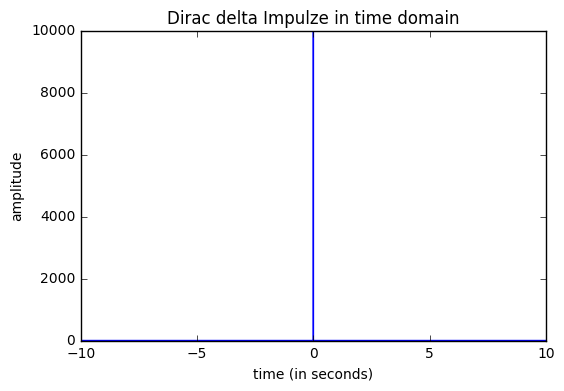

400001
104792


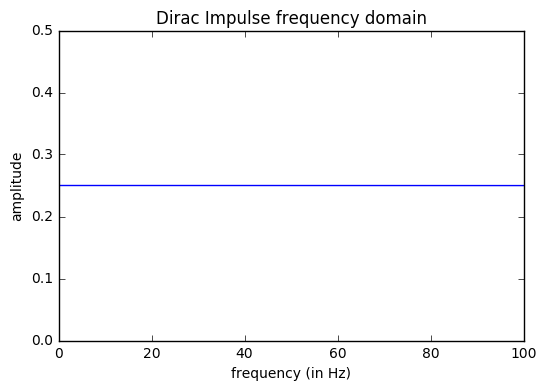

In [32]:
%matplotlib inline 

import numpy as np
import pylab
import matplotlib.pyplot as plt
import math
from scipy.fftpack import rfft, rfftfreq, irfft

start_time = -20
stop_time = 20
time_to_plot = 40 # seconds
sample_rate = 10000 # In Hz, the number of samples per second
total_number_of_sample = sample_rate * time_to_plot + 1 #Odd numbers get you zero with linspace
t = np.linspace(start_time, stop_time, total_number_of_sample) #Odd numbers get you zero with linspace

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

#Impulze/DIrac delta
dirac_impulze = np.linspace(0,1,total_number_of_sample)

for i in range(len(t)):
    if(t[i] == 0):
        dirac_impulze[i]  = 100000
    else:
        dirac_impulze [i] = 0
        
setup_graph(x_label='time (in seconds)', y_label='amplitude', title='Dirac delta Impulze in time domain')
plt.axis([-10, 10, 0,10000])
plt.plot(t, dirac_impulze)
plt.show()

fft_output_dirac_impulze = rfft(dirac_impulze)
fft_magnitude_only_dirac_impulze = np.abs(fft_output_dirac_impulze) / len(fft_output_dirac_impulze)
frequencies_fft_dirac_impulze= rfftfreq(len(dirac_impulze),1/sample_rate) # Calculate all possible frequencies in signal.
setup_graph(x_label='frequency (in Hz)', y_label='amplitude', title='Dirac Impulse frequency domain')
j=0
for i in range(len(fft_magnitude_only_dirac_impulze)): # To remove unwanted noise
    if fft_magnitude_only_dirac_impulze[i] <= 0.1:
        fft_magnitude_only_dirac_impulze[i] = fft_magnitude_only_dirac_impulze[i -1]
        j = j +1
print(len(fft_magnitude_only_dirac_impulze))
print(j)
plt.axis([0, 100, 0, 0.5])
plt.plot(frequencies_fft_dirac_impulze, fft_magnitude_only_dirac_impulze, 'b')
plt.show()